In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D


In [3]:
os.system('pwd')

f = np.load('helix-complete-train.npy')
print(f.shape)

/home/DAVIDSON/bewagner/summer2023/ATTPCPoinTr/data/DummyData/helix
(3000, 512, 3)


Using fig.add_subplot ...


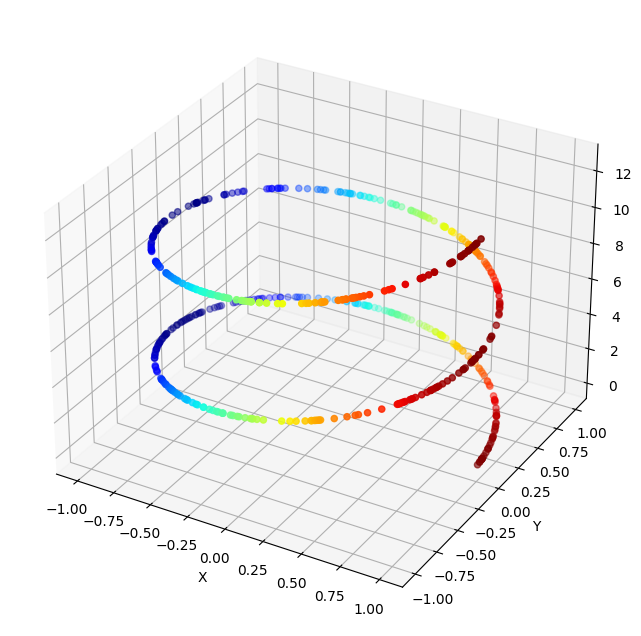

In [4]:
def get_ptcloud_img(ptcloud):
    fig = plt.figure(figsize=(8, 8))

    # x, z, y = ptcloud.transpose(1, 0)
    x = ptcloud[:, 0]
    y = ptcloud[:, 1]
    z = ptcloud[:, 2]
    try:
        ax = fig.gca(projection=Axes3D.name, adjustable='box')
        print('Using fig.gca ...')
    except:
        ax = fig.add_subplot(projection=Axes3D.name, adjustable='box')
        print('Using fig.add_subplot ...')
    # ax.axis('off')
    # ax.axis('scaled')
    # ax.view_init(30, 45)
    max, min = np.max(ptcloud), np.min(ptcloud)
    ax.set_xbound(min, max)
    ax.set_ybound(min, max)
    ax.set_zbound(min, max)
    ax.scatter(x, y, z, zdir='z', c=x, cmap='jet')

    fig.canvas.draw()
    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3, ))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    return img

img = get_ptcloud_img(f[0])

# true = np.load('../../Mg22-Ne20pp/data/')

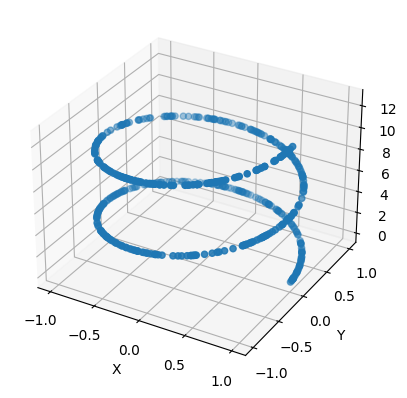

In [5]:
def visualize(matrix=None, file=None, name=None, event=0):

    if file != None and matrix != None:
        print('Error: Too many point clouds provided!')
        exit(1)    
    elif file != None:
        f = np.load(file)
        xs = f[event, :, 0]
        ys = f[event, :, 1]
        zs = f[event, :, 2]
    else:
        xs = matrix[:, 0]
        ys = matrix[:, 1]
        zs = matrix[:, 2]
    # elif file == None and matrix == None:
    #     print('Error: Too few point clouds provided!')
    #     exit(1)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(xs, ys, zs)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

    # if file != None and name == None:
    #     plt.savefig(file[:-4]+'.png')
    # else:
    #     plt.savefig(str(name)+'.png')

visualize(matrix=f[0])

In [6]:
os.getcwd()

'/home/DAVIDSON/bewagner/summer2023/ATTPCPoinTr/data/DummyData/helix'

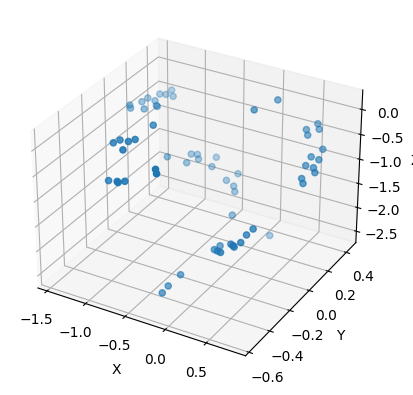

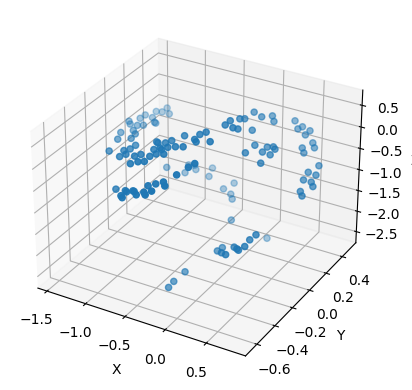

In [16]:
event = 4

visualize(file='../../Mg22-Ne20pp/data/64p/zsliced_Mg22_test.npy', event=event)
visualize(file='../../Mg22-Ne20pp/data/Mg22_size128_convertXYZQ_test.npy', event=event)